# Phase 2: Baseline Modeling & Benchmarking
## Ali4Concrete Nexus Framework

**Objective:**
To establish a performance benchmark ($R^2$ Score) by comparing traditional linear approaches against modern machine learning algorithms. This step answers the research question: *"How much accuracy do we gain by moving from formulas to AI?"*

**Hypothesis:**
Concrete strength is a non-linear function of its components (especially with SCMs like Slag/Fly Ash). Therefore, non-linear models (Random Forest) should significantly outperform linear models (Linear Regression).

**Methodology:**
1. **Data Splitting:** 80% Training (Learning) / 20% Testing (Validation).
2. **Models:**
   - **Linear Regression (LR):** Represents the "Formula" approach (assuming linear relationships).
   - **Random Forest (RF):** Represents the "AI/Black Box" approach (capturing complexity).
3. **Metrics:** $R^2$ Score, MAE (Mean Absolute Error), RMSE (Root Mean Squared Error).

In [1]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configuration for cleaner output
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid") # Ali4Concrete Visual Theme

print(" Libraries Imported Successfully!")
print("Ready for Phase 2: Benchmarking Arena.")

 Libraries Imported Successfully!
Ready for Phase 2: Benchmarking Arena.


In [3]:
# --- 2. Load & Prepare Data ---

def load_and_split_data(filepath: str, target_col: str = 'strength'):
    """
    Loads processed data and splits it into training and testing sets.
    
    Args:
        filepath (str): Path to the processed CSV from Phase 1.
        target_col (str): The column we want to predict (Compressive Strength).
        
    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    # Load data
    df = pd.read_csv(filepath)
    print(f"--- Data Loaded: {len(df)} samples ---")
    
    # Define Features (Inputs) and Target (Output)
    # We drop 'strength' because it's the answer key
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Split Data: 80% Training (School), 20% Testing (Exam)
    # random_state=42 ensures we get the same split every time (Crucial for Research Integrity)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Data Split Summary:")
    print(f"Training Set: {X_train.shape[0]} samples (The 'School')")
    print(f"Testing Set:  {X_test.shape[0]} samples (The 'Exam')")
    
    return X_train, X_test, y_train, y_test

# Execute
# We use the file we created in Phase 1
X_train, X_test, y_train, y_test = load_and_split_data('uci_concrete_clean_physics_engineered.csv')

--- Data Loaded: 1005 samples ---
Data Split Summary:
Training Set: 804 samples (The 'School')
Testing Set:  201 samples (The 'Exam')


In [4]:
# --- 3. Model Training (The Benchmarking Arena) ---

def train_baseline_models(X_train, y_train):
    """
    Trains two distinct models to represent Traditional vs. AI approaches.
    """
    models = {}
    
    # A. Linear Regression (The Baseline)
    # Simulates how traditional equations work (assumes simple straight-line relationships)
    print(" Training Linear Regression (Traditional Approach)...")
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    models['Linear Regression'] = lr
    
    # B. Random Forest (The Challenger)
    # An ensemble of decision trees that can capture complex, non-linear physics
    print(" Training Random Forest (AI Approach)...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    models['Random Forest'] = rf
    
    print(" All Models Trained Successfully!")
    return models

# Execute Training
trained_models = train_baseline_models(X_train, y_train)

 Training Linear Regression (Traditional Approach)...
 Training Random Forest (AI Approach)...
 All Models Trained Successfully!


In [5]:
# --- 4. Performance Evaluation (The Scorecard) ---

def evaluate_models(models, X_test, y_test):
    """
    Calculates error metrics to scientifically compare models.
    """
    results_summary = []
    
    print("\n --- PERFORMANCE REPORT ---")
    for name, model in models.items():
        # Make predictions (Take the exam)
        y_pred = model.predict(X_test)
        
        # Calculate scores
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Print detailed report
        print(f">>> Model: {name}")
        print(f"    MAE (Avg Error):       {mae:.2f} MPa")
        print(f"    RMSE (Root Mean Sq):   {rmse:.2f} MPa")
        print(f"    R² Score (Accuracy):   {r2:.4f}")
        print("-" * 30)
        
        results_summary.append({'Model': name, 'R2': r2, 'Predictions': y_pred})
        
    return results_summary

# Execute Evaluation
results = evaluate_models(trained_models, X_test, y_test)

# Calculate Improvement Percentage
r2_lr = results[0]['R2'] # Linear Regression R2
r2_rf = results[1]['R2'] # Random Forest R2
improvement = ((r2_rf - r2_lr) / r2_lr) * 100

print(f"\n CONCLUSION:")
print(f"AI (Random Forest) improved accuracy by {improvement:.1f}% over the Linear Baseline.")


 --- PERFORMANCE REPORT ---
>>> Model: Linear Regression
    MAE (Avg Error):       8.82 MPa
    RMSE (Root Mean Sq):   11.10 MPa
    R² Score (Accuracy):   0.5868
------------------------------
>>> Model: Random Forest
    MAE (Avg Error):       3.47 MPa
    RMSE (Root Mean Sq):   4.95 MPa
    R² Score (Accuracy):   0.9179
------------------------------

 CONCLUSION:
AI (Random Forest) improved accuracy by 56.4% over the Linear Baseline.


 Plot saved as '02_baseline_model_comparison.png'


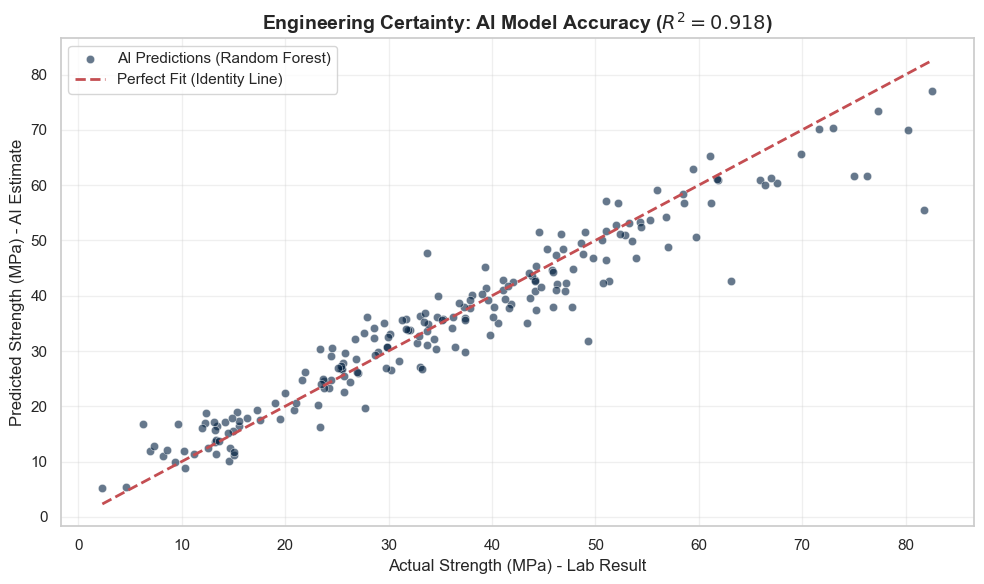

In [6]:
# --- 5. Visualization: Prediction vs Reality ---

def plot_benchmark_results(y_test, results):
    """
    Generates a scatter plot to visually demonstrate AI superiority.
    """
    plt.figure(figsize=(10, 6))
    
    # We plot the best model (Random Forest)
    best_model_data = results[1] # Index 1 is Random Forest
    y_pred = best_model_data['Predictions']
    r2 = best_model_data['R2']
    
    # Scatter Plot of AI Predictions
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='#001f3f', label='AI Predictions (Random Forest)')
    
    # Perfect Fit Line (Identity Line)
    # If points lie on this line, prediction is perfect (Error = 0)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Fit (Identity Line)')
    
    # Styling
    plt.title(f"Engineering Certainty: AI Model Accuracy ($R^2 = {r2:.3f}$)", fontsize=14, fontweight='bold')
    plt.xlabel("Actual Strength (MPa) - Lab Result", fontsize=12)
    plt.ylabel("Predicted Strength (MPa) - AI Estimate", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Save Artifact
    plt.tight_layout()
    plt.savefig('02_baseline_model_comparison.png', dpi=300)
    print(" Plot saved as '02_baseline_model_comparison.png'")
    plt.show()

# Execute Plotting
plot_benchmark_results(y_test, results)